<p><strong>Roll Number: 18110175</strong></p>
<p><strong>Name: Hussain Hayat</strong></p>
<br>
<H3><b> PHASE 1 </b></H3>

<b>Import libraries and datasets</b>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# FOR DATA MANIPULATION
import pandas as pd
import re
from datetime import datetime,date
import numpy

# FOR DATA VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
from IPython.display import Image 
import pydotplus
from wordcloud import WordCloud, STOPWORDS

# FOR DATA MINING
import sklearn.linear_model
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.externals.six import StringIO 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve




app_data = pd.read_csv('Data/googleplaystore.csv')
app_reviews = pd.read_csv('Data/googleplaystore_user_reviews.csv')

C:\Users\Hussain\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Hussain\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


<b> View Data

In [2]:
app_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
app_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


<hr>
<h2><b>DATA PREPROCESSING AND EXPLORATION
    <hr>

<b>Clean Text (App Name)

App names need to be cleaned in case they contain illegal characters. A regular expression is used to clean the app name.

In [6]:
def cleanword(word):
    ret_word = ''
    matches = re.findall("[a-zA-Z 0-9-/'!.&]",word)
    for part in matches:
        ret_word = ret_word + part
    return (ret_word.upper())

app_reviews['App'] = app_reviews['App'].apply(cleanword)
app_data['App'] = app_data['App'].apply(cleanword)

<b>Removing NAs and duplicates

Here, we drop both columns with NAs and duplicates.

In [7]:
#Look for NAs
app_reviews.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [8]:
app_data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [9]:
print(app_data.shape)
print(app_reviews.shape)
app_data['Rating'] = app_data['Rating'].fillna(app_data['Rating'].median())

(10841, 13)
(64295, 5)


In [10]:
app_reviews = app_reviews.dropna(how='any')
app_data = app_data.dropna(how='any')

In [11]:
app_reviews = app_reviews.drop_duplicates()
app_data = app_data.drop_duplicates()

In [12]:
print(app_data.shape)
print(app_reviews.shape)

(10346, 13)
(29692, 5)


<b><h3> Data Exploration & Transformation

<b>ADDING NEW VARIABLES

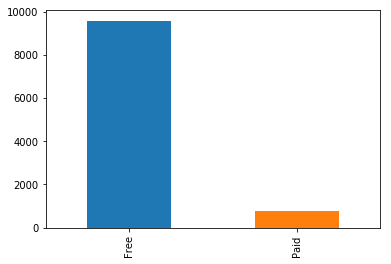

In [13]:
def is_free(row):
    if row=="Free":
        return True
    else:
        return False
    
app_data['Is Free'] = app_data['Type'].apply(is_free)
app_data['Type'].value_counts().plot(kind='bar')

We can see that only a small percentage of the apps are paid.

In [14]:


def to_time(row):
    return datetime.strptime(row, '%B %d, %Y')

app_data['Last Updated'] = app_data['Last Updated'].apply(to_time)

max_date = max(app_data['Last Updated'])

def days_diff(row):
    date_today = max_date
    return (date_today-row).days

app_data['Last Update Days'] = app_data['Last Updated'].apply(days_diff)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DE24045390>]],
      dtype=object)

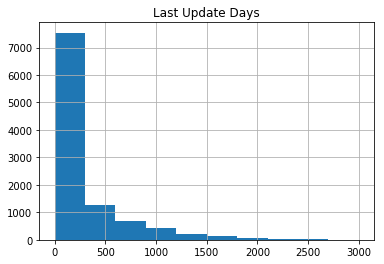

In [15]:
app_data.hist(column='Last Update Days')

Here we compare how recently apps were updated as compared to the most recently updated app. Most of these were updated within the year, however outliers are present with some not being updated for a few years (>1500 days for some)

<b> THE PRICE COLUMN

In [16]:
def pricetonum(row):
    return float(row.replace("$",''))

app_data['Price'] = app_data['Price'].apply(pricetonum)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DE23F55AC8>]],
      dtype=object)

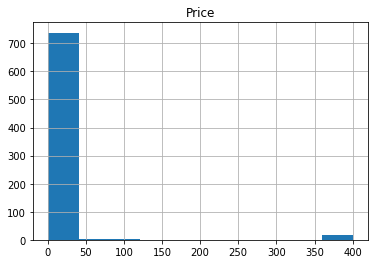

In [17]:
app_data.loc[app_data['Price']>0].hist(column='Price')

Since most of the apps are paid, we're looking at apps with prices above 0. As can be seen from the above histogram, there are a few outliers with apps having prices>300. Lets look at how many apps these are to see if they can be filtered without much loss of data.

In [18]:
app_data[(app_data['Price'] > 30) & (app_data['Price'] <400 )].shape

(28, 15)

Only 28 apps are over $30 so these can safely be excluded as outliers.

In [19]:
app_data = app_data[(app_data['Price'] < 30)]

<b> THE INSTALLS COLUMN

In [20]:
print((app_data['Installs']).unique())

def numinstalls(row):
    return float(row.replace("+","").replace(",",""))
    
app_data['Installs'] = app_data['Installs'].apply(numinstalls)


['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+']


To convert the app installs into numbers, we can remove the commas and the + sign to obtain a number. This is a safe approximation considering that there are close milestones for app installs, for example apps that are categorized as 1000+ are between 1000 and 5000 (otherwise it would have been categorized as 5000+) so this is safe approximation.

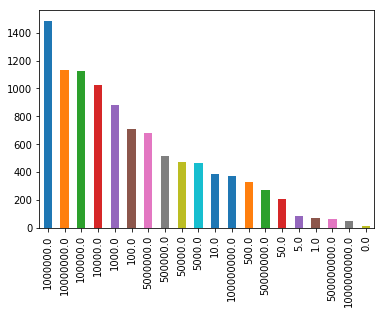

In [21]:
app_data['Installs'].value_counts().plot(kind='bar')

Most of the apps have over 1,000,000 installs. This gives us confidence that most of our apps are popular ones with a small number of apps with installs under 50,000.

<b> THE APP SIZE COLUMN

In [22]:
def tosize(row):
    if row[-1]=="M":
        ret_val = float(row[0:len(row)-1])
        return ret_val
    elif row[-1]=="k":
        ret_val = float(row[0:len(row)-1])
        return ret_val/1024
    else:
        return row


app_data['Size'] = app_data['Size'].apply(tosize)

#print(data['Size'].unique)

Here we convert the app size to number by allocating the app size in kilobytes to the variable size. However we still need to deal with the value <i>'Varies with device'.

In [23]:
app_data.loc[app_data['Size']=='Varies with device'].shape

(1525, 15)

There are 1525 such apps so replacing them might not be a good idea. Lets treat them as missing values and replace them with the mean app size.

In [24]:
mean_appsize = app_data.loc[app_data['Size']!='Varies with device']['Size'].mean()

def replace_appsize(row):
    if row=="Varies with device":
        return mean_appsize
    else:
        return row
    
app_data['Size'] = app_data['Size'].apply(replace_appsize)

<b> NUM REVIEWS COLUMN

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DE24427EF0>]],
      dtype=object)

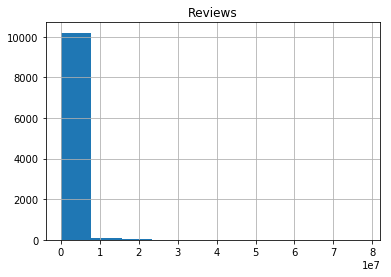

In [25]:
def tonum(row):
    return float(row)

app_data['Reviews'] = app_data['Reviews'].apply(tonum)
app_data.hist(column='Reviews')

Most of the apps have reviews under 10,000,000. Lets take a closer look as to how num of reviews are distributed in the group

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DE24AFA400>]],
      dtype=object)

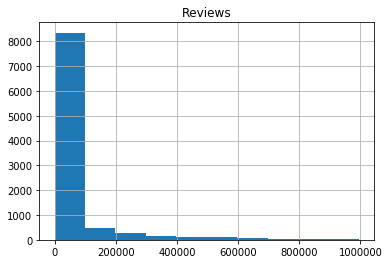

In [26]:
app_data[(app_data['Reviews'] < 1000000)].hist(column='Reviews')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DE24BA0B70>]],
      dtype=object)

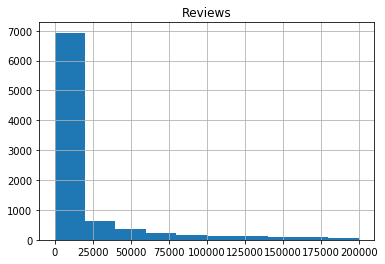

In [27]:
app_data[(app_data['Reviews'] < 200000)].hist(column='Reviews')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DE24A91320>]],
      dtype=object)

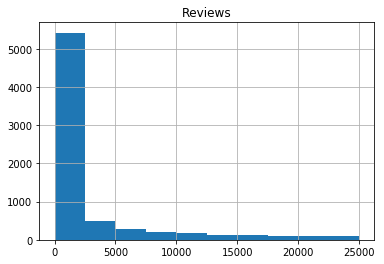

In [28]:
app_data[(app_data['Reviews'] < 25000)].hist(column='Reviews')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DE24C6FDD8>]],
      dtype=object)

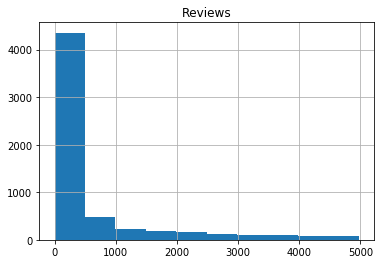

In [29]:
app_data[(app_data['Reviews'] < 5000)].hist(column='Reviews')

In [30]:
app_data[(app_data['Reviews'] < 5000)].shape

(5905, 15)

Constantly looking at histograms with limited ranges, we can see most apps have reviews under 5000, (4455 out of 8861 apps so around 50%)

In [31]:
app_data[(app_data['Installs'] >= 50000)].shape

(6169, 15)

We saw earlier that there are few apps with under 50,000 installs. We see that even though most of the apps have installs over 50,000 most of them do not have reviews that are high.

<b> CONTENT RATING COLUMN

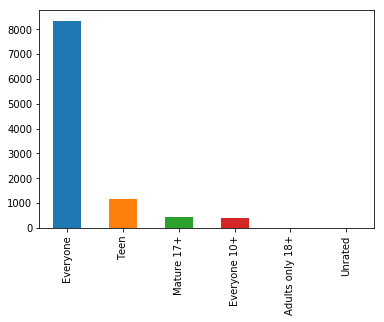

In [32]:
app_data['Content Rating'].value_counts().plot(kind='bar')

In [33]:
app_data[app_data['Content Rating']=='Unrated']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Is Free,Last Update Days
7312,BEST CG PHOTOGRAPHY,FAMILY,4.3,1.0,2.5,500.0,Free,0.0,Unrated,Entertainment,2015-06-24,5.2,3.0 and up,True,1141
8266,DC UNIVERSE ONLINE MAP,TOOLS,4.1,1186.0,6.4,50000.0,Free,0.0,Unrated,Tools,2012-02-27,1.3,2.3.3 and up,True,2354


This is a tool and can be safely categorized under Everyone.

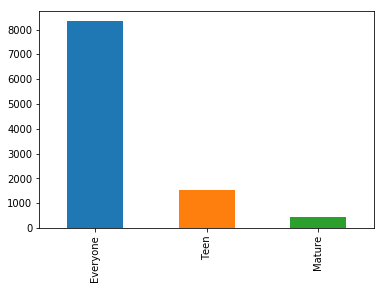

In [34]:
def grouprating(row):
    if row in ["Teen","Everyone 10+"]:
        return "Teen"
    elif row in ["Mature 17+","Adults only 18+"]:
        return "Mature"
    else:
        return "Everyone"

app_data['Content Rating'] = app_data['Content Rating'].apply(grouprating)
app_data['Content Rating'].value_counts().plot(kind='bar')

In [35]:
def is_teen(row):
    if row=="Teen":
        return True
    else:
        return False
    
def is_mature(row):
    if row=="Mature":
        return True
    else:
        return False
    
app_data['Is Teen'] = app_data['Content Rating'].apply(is_teen)
app_data['Is Mature'] = app_data['Content Rating'].apply(is_mature)

Declare two new dummy variables so we can run regression later if needed. (No variable for is_everyone to avoid the dummy trap)

<b> Current Version Column

In [36]:
def cleanversion(word):
    ret_word = ''
    periodfound = False
    numpart = ''
    decpart = ''
    matches = re.findall("[0-9.]",word)
    
    if word=="Varies with device":
        return None
    for part in matches:
        if part==".":
            periodfound=True
            continue
        if periodfound and part!=".":
            decpart = decpart + part
        elif not periodfound and part!=".":
            numpart = numpart + part
            
    ret_word = numpart + "." + decpart
    try:
        return float(ret_word)
    except:
        return None


app_data['Current Ver Num'] = app_data['Current Ver'].apply(cleanversion)

Here version number is converted to a numeber. The logic is weak but might be useful later on. (Will need to see when a model is made). The logic is that version numbers that are high might have been updated more. So new apps with fewer updates would have versions like 1.23 or 1.0.1 whereas the more updated ones might have 7.9.2 etc.

<b> Android Version Column

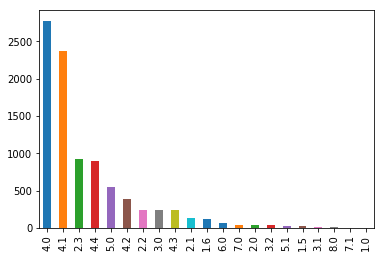

In [37]:
def getandver(word):
    if word=="Varies with device":
        return None
    ret_ver = ''
    ver = word.split(' ')[0]
    verarr = re.findall("[0-9.]",ver)
    for part in verarr:
        ret_ver = ret_ver + part
    if len(ret_ver)>3:
        return float(ret_ver[0:3])
    else:
        return float(ret_ver)
        
    
app_data['Android Ver Num'] = app_data['Android Ver'].apply(getandver)
app_data['Android Ver Num'].value_counts().plot(kind='bar')

We can see that most of the apps require Android 4 and above.

<b> Check for data accuracy in the app_reviews data

In [38]:
print(app_reviews[(app_reviews['Sentiment']=="Positive") & (app_reviews["Sentiment_Polarity"]<0)].shape)
print(app_reviews[(app_reviews['Sentiment']=="Negative") & (app_reviews["Sentiment_Polarity"]>0)].shape)

(0, 5)
(0, 5)


<b><h3> DATA INTEGRATION

<b>JOIN THE TWO DATASETS

In [39]:
data = pd.merge(app_data,app_reviews,on='App',how='left')

<b><h3>MORE DATA VISUALIZATION

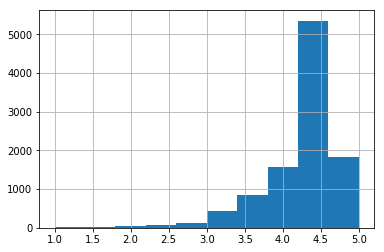

In [41]:
app_data['Rating'].hist()

Most of the apps have ratings over 4.0

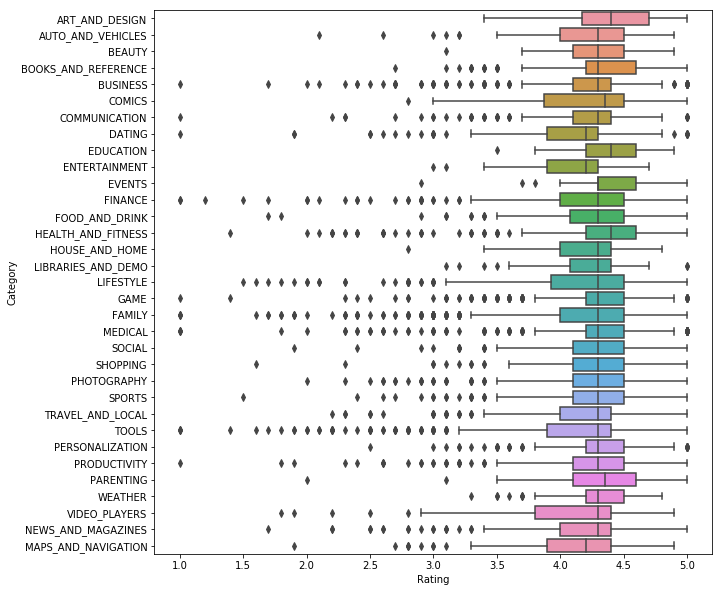

In [43]:
plt.figure(figsize=(10,10))
sns.boxplot(app_data['Rating'],app_data['Category'])

Some of the categories seem to be doing better in terms of ratings.

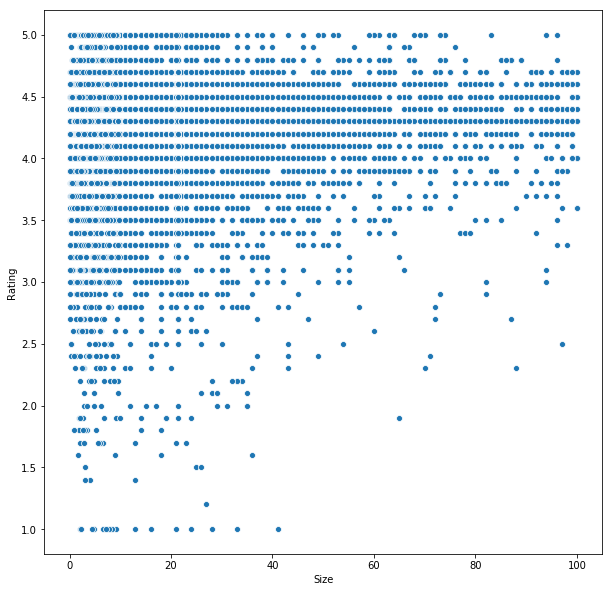

In [44]:
plt.figure(figsize=(10,10))
sns.scatterplot(y=app_data['Rating'],x=app_data['Size'])

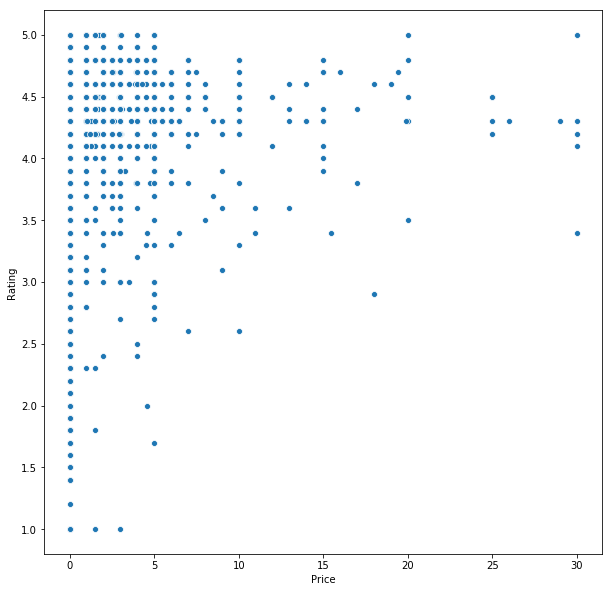

In [45]:
plt.figure(figsize=(10,10))
sns.scatterplot(y=app_data['Rating'],x=app_data['Price'])

Text(0.5,1,'Paid Apps Ratings')

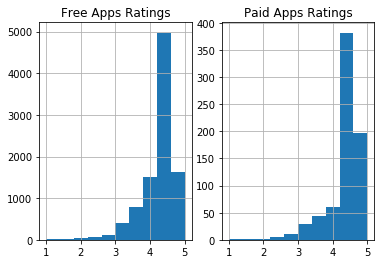

In [46]:
import numpy
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 2)

app_data[app_data['Type']=="Free"]['Rating'].hist(ax = axes[0])
axes[0].set_title('Free Apps Ratings')
app_data[app_data['Type']!="Free"]['Rating'].hist(ax=axes[1])
axes[1].set_title('Paid Apps Ratings')

We can see from the above histograms that paid apps seem to be doing better in terms of ratings.

Text(0.5,1,'Paid Apps Ratings')

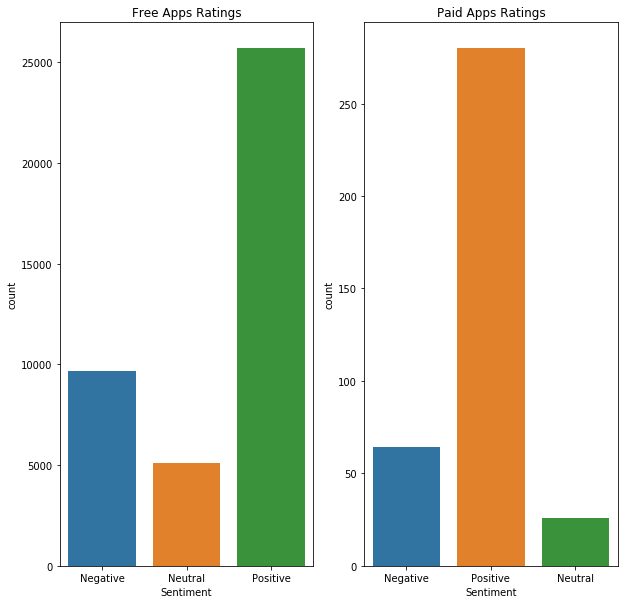

In [47]:
fig, axes = plt.subplots(1, 2,figsize=(10,10))
sns.countplot(data[data['Type']=="Free"]['Sentiment'],ax=axes[0])
axes[0].set_title('Free Apps Ratings')
sns.countplot(data[data['Type']!="Free"]['Sentiment'],ax=axes[1])
axes[1].set_title('Paid Apps Ratings')


Consistent with the distribution of the app ratings, most of the sentiments are positive.

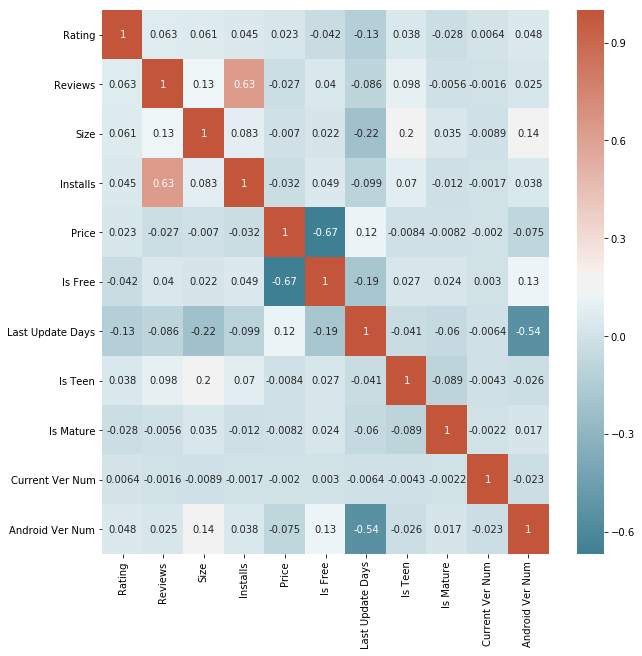

In [48]:
plt.figure(figsize=(10,10)) 
corr = sns.heatmap(app_data.corr(),annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

We can see the following points from the above correlation matrix:
<ul> 
<li>Installs and reviews are positiviely correlated which is pretty intuitive. People might be checking reviews before installing new apps. </li>
<li>Android Version number requirement and Last Updated Days is negatively correlated. This shows that apps with low android ver req are older ones that have not been updated for a long time.
    <li> There are other correlations as well but these are not too strong.</li>
</ul>

<H3><B> PHASE 2 </B></H3>

<hr>
<h2><b>EXPLORING AND PREDICTING HIGH RATINGS:</b></h2>
<hr>
<br/> 
1- How to get a high rating <br/>
2- Predict the app rating of an app <br/>

<H3><B> LINEAR REGRESSION </B></H3>

First, we need to convert categorical values in the category column to dummy variables so they can be used in regression.

In [49]:
cat_names = ((app_data['Category']).unique())
cat_names = cat_names[cat_names!='GAME']
dummies = pd.get_dummies(app_data['Category'])[cat_names]
app_data = pd.concat([app_data,dummies],axis=1)

Next, we need to select the attributes to run regression. We will drop all variables that are unlikely to be helpful as well as those that contains NAs 

In [50]:
nacounts = pd.DataFrame(app_data.isnull().sum())
nacounts[nacounts[0]!=0]

,0
Current Ver Num,1317
Android Ver Num,1220


MODEL MEAN SQUARED ERROR: 0.21922683418677832
MODEL R2 SCORE: 0.048182808537699295


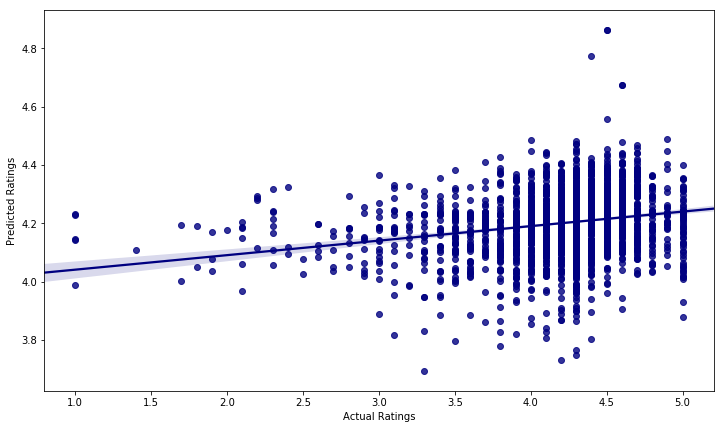

In [53]:
X = app_data.drop(labels = ['Rating','Category','App','Type','Content Rating','Genres','Last Updated','Current Ver','Android Ver','Current Ver Num','Android Ver Num'],axis=1)
y = app_data['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

model = sklearn.linear_model.LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

def reportplot_model(y_test,y_pred):
    print("MODEL MEAN SQUARED ERROR:",metrics.mean_squared_error(y_test,y_pred))
    print("MODEL R2 SCORE:",metrics.r2_score(y_test,y_pred))

    plt.figure(figsize=(12,7))
    sns.regplot(y_test,y_pred,color='navy', label = 'Integer')
    plt.ylabel('Predicted Ratings')
    plt.xlabel('Actual Ratings')
    plt.show()
    
reportplot_model(y_test,y_pred)


<H3> <B> ENSEMBLE METHODS - RANDOM FOREST REGRESSOR </B></H3>

Lets try to imporve our regression results using ensemble methods.

MODEL MEAN SQUARED ERROR: 0.2082720837209302
MODEL R2 SCORE: 0.11036829713477647


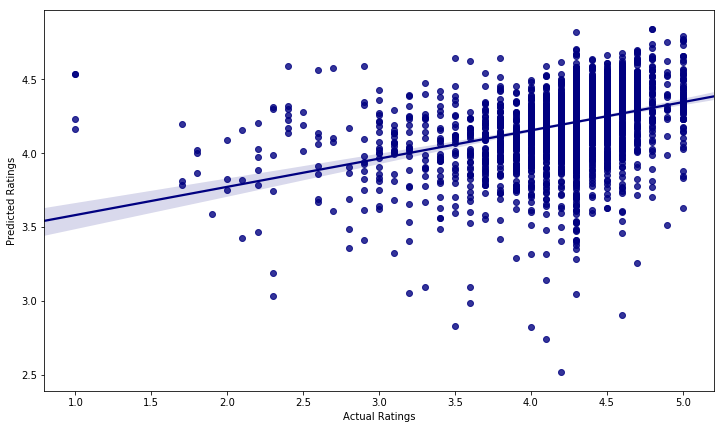

In [56]:
#Integer encoding
X = app_data.drop(labels = ['Rating','Category','App','Type','Content Rating','Genres','Last Updated','Current Ver','Android Ver','Current Ver Num','Android Ver Num'],axis=1)
y = app_data['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
model2 = RandomForestRegressor(n_estimators=100)
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)

    
reportplot_model(y_test,y_pred2)

<h3><b> ANALYSIS

By visualizing the plots above we see that the regression does not result in a very good predictor for app ratings. Both models score low in R2 score. However the Mean squared error seems to be low which shows that the line is a good fit and close to the true line. However this is because most of the apps have a high rating.
We can see that no apps have rating below 4 in the linear regression example. This is not the case for the random forest regressor which does a much better job at predicting rating since it predicts over a wider range. However both regressors are heavily infulenced by the high number of apps with a high number of ratings.

Combining the results of our data visulaization and data mining techniques we can see that the following isights can be dervied in terms of getting higher ratings for apps:

<li>Apps in the art and design category seem to be doing better than other categories.
<li>Paid apps are also getting a higher rating. (Using the wordcloud below we can see that ads is a keyword in the app reviews). So lower number of ads should be used if the app is free.
<li> Apps that are lower in size are preferred more by users and get higher ratings and installs.
<li> Apps that have a lower price tend to be preferred by users. 

<H2><B> USING MULTI-CLASS CLASSIFICATION

<H3><B> DECISION TREE

We can solve this problem using a classification approach as well. We wont get an exact rating in this way but we might be able to get a ballpark figure using this technique. 

We use the following labels to classify apps. This will make this a <b>multi-class classfication problem.</b>
<ul><li> 4.5+ - Excellent
    <li> 4-4.5 - Good
    <li> 3.5-4 - Average
    <li> 2.5-3.5 - Bad
    <li> Below 2.5 - Extremely Bad

In [57]:
def label_class(row):
    if row>=4.5:
        return 4
    elif row>=4 and row<4.5:
        return 3
    elif row>=3.5 and row<4:
        return 2
    elif row>=2.5 and row<3.5:
        return 1
    elif row<2.5:
        return 0
    else:
        return None

app_data['Label'] = app_data['Rating'].apply(label_class)

0.5228682170542636


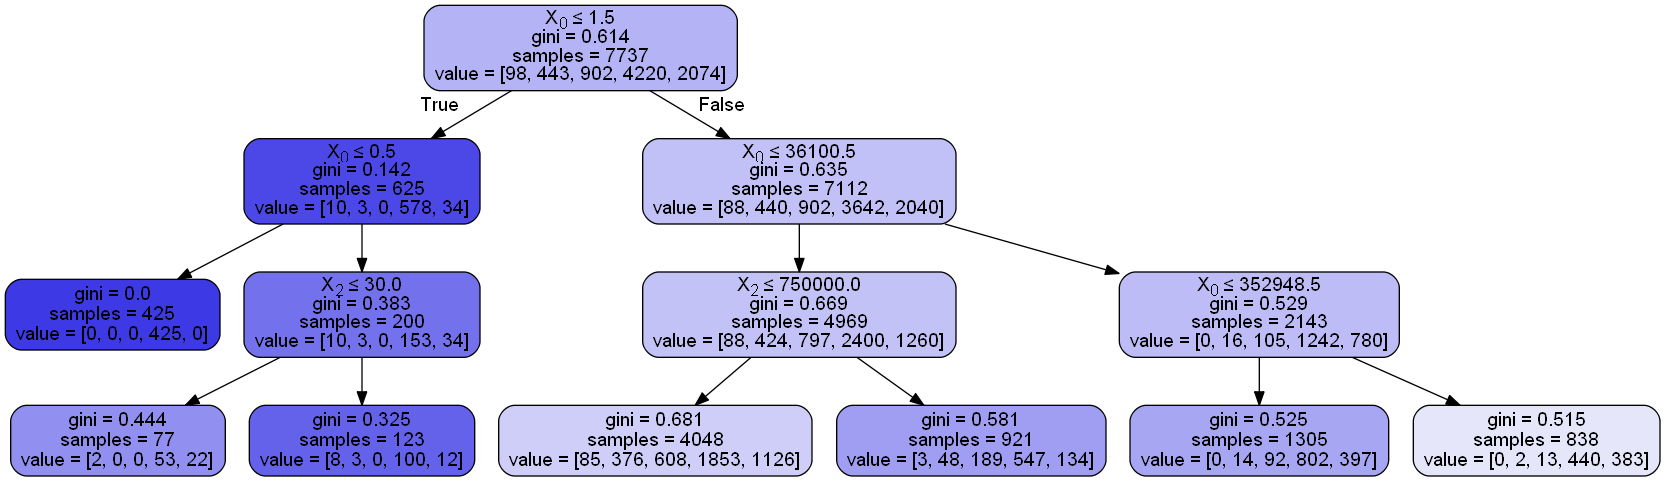

In [59]:
X = app_data.drop(labels = ['Rating','Category','App','Type','Content Rating','Genres','Last Updated','Current Ver','Android Ver','Current Ver Num','Android Ver Num','Label'],axis=1)
y = app_data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


# dtree_model = DecisionTreeClassifier(max_depth = 4).fit(X_train, y_train) 
# dtree_predictions = dtree_model.predict(X_test) 
# print(dtree_model.score(X_test,y_test))

# # creating a confusion matrix 
# cm = confusion_matrix(y_test, dtree_predictions) 


dot_data = StringIO()
dtree = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train) 
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
print(dtree.score(X_test,y_test))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Looking at the results of the decsison tree classifier, we can see that it much better job than our previous regressions. We can see that size, the number of reviews and installs are important factors that allow us to classify apps.

<b><h3> ONE VS REST

In [60]:


X = app_data.drop(labels = ['Rating','Category','App','Type','Content Rating','Genres','Last Updated','Current Ver','Android Ver','Current Ver Num','Android Ver Num','Label'],axis=1)
y = app_data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
onevrestmodel = OneVsRestClassifier(LogisticRegression())
onevrestmodel.fit(X_train,y_train)

## Validate model with test data
onevrest_predicted = pd.DataFrame(onevrestmodel.predict(X_test))
onevrest_matrix = confusion_matrix(y_test, onevrest_predicted)

print("Model score",metrics.accuracy_score(y_test,onevrest_predicted))


Model score 0.5414728682170543


Looking at this model we can see that it does a similar job in terms of performance to the Decision Tree Classifier.

<H2><B>USING BINARY CLASSIFICATION

We can also use a binary classifier to predict app ratings. We choose to classify apps as successful or unsuccessful i.e app rating over 4.5 will be classified as successful.

In [61]:
def binary_classify(row):
    if row>=4:
        return 1
    else:
        return 0
    

app_data['Successful'] = app_data['Rating'].apply(binary_classify)

In [64]:
X = app_data.drop(labels = ['Rating','Category','App','Type','Content Rating','Genres','Last Updated','Current Ver','Android Ver','Current Ver Num','Android Ver Num','Label','Successful'],axis=1)
X = X.drop(labels = cat_names,axis=1)
y = app_data['Successful']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


logit_model = LogisticRegression()

logit_model = logit_model.fit(X_train, y_train)  

predicted = pd.DataFrame(logit_model.predict(X_test))

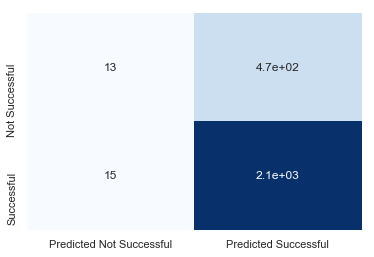

In [65]:

conf_matrix = confusion_matrix(y_test, predicted)

## Visualize your evaluation results. 
## Hint: Check Seaborn for something that could help you with this.
evaluation_df = pd.DataFrame(conf_matrix)
evaluation_df = evaluation_df.rename(columns={0: 'Predicted Not Successful', 1: 'Predicted Successful'})
evaluation_df = evaluation_df.rename(index={0: 'Not Successful', 1: 'Successful'})

sns.set()
sns.heatmap(evaluation_df, annot=True,cbar=False,cmap="Blues")

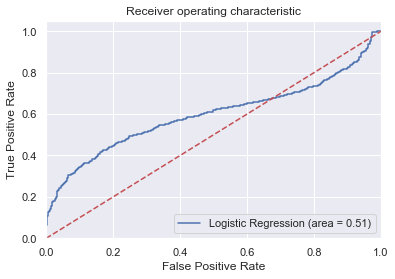

In [66]:
logit_roc_auc = roc_auc_score(y_test, logit_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logit_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Using logistic regression we can see that our model is not useful since the area under the ROC curve is roughly equal to 0.5. Moreover most of the apps were just classified as successful.

<h2><b>USING REVIEWS DATA

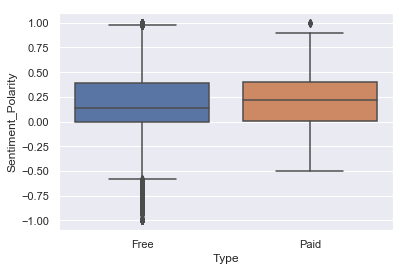

In [67]:
sns.boxplot(data['Type'],data['Sentiment_Polarity'])

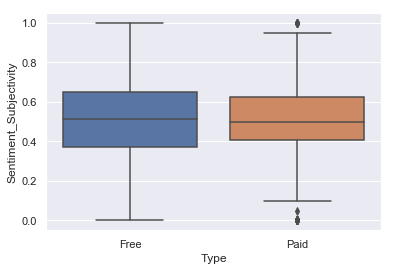

In [68]:
sns.boxplot(data['Type'],data['Sentiment_Subjectivity'])

In [69]:
stopwords = set(STOPWORDS)
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

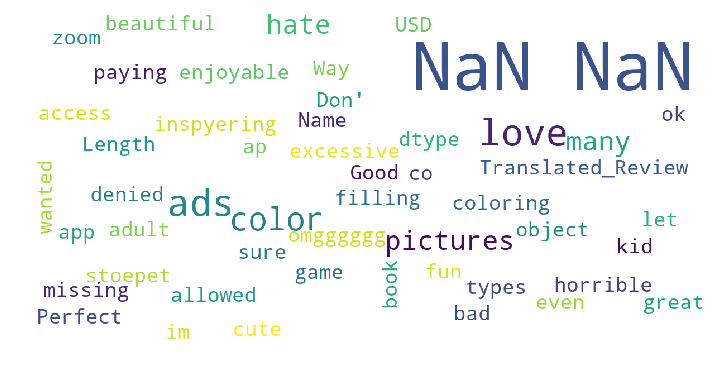

In [70]:
show_wordcloud(data[(data['Type']=="Free") & (data["Translated_Review"]!="NaN")]['Translated_Review'])

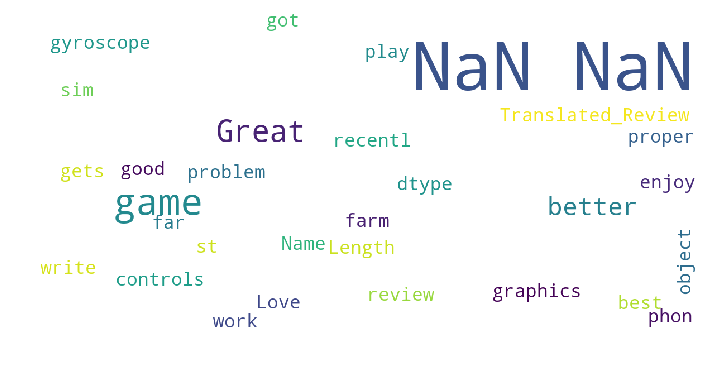

In [71]:
show_wordcloud(data[(data['Type']=="Paid") & (data["Translated_Review"]!="NaN")]['Translated_Review'])

<br/><hr>
<h2><b> CORRELATION BETWEEN DIFFERENT ATTRIBUTES<hr>

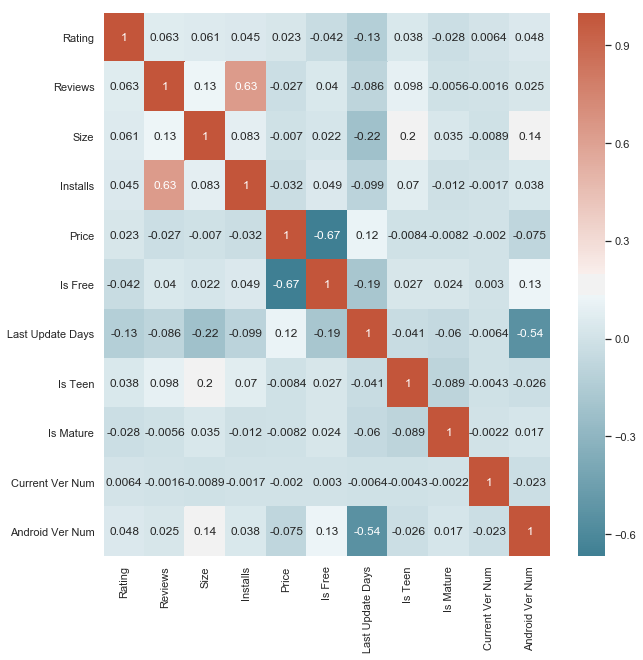

In [72]:
plt.figure(figsize=(10,10)) 
cols = ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Is Free', 'Last Update Days', 'Is Teen', 'Is Mature',
       'Current Ver Num', 'Android Ver Num']
corr = sns.heatmap(app_data[cols].corr(),annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Looking at the correlation analysis, we can see the following:
<ul><li> Installs and Reviews are positively correlated showing that higher reviews may lead to more installs since people might check reviews before installing. More installs are also likely to lead to a higher number of reviews.
<li> Size and Last Update Days are negatively correlated. This shows that apps that have not been updated for a long while might be smaller in size. Lets confirm this using data visualization.

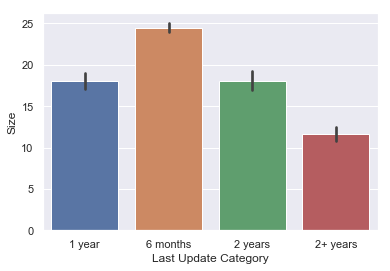

In [74]:
def lastupdatecat(row):
    if row<180:
        return "6 months"
    elif row>180 and row<365:
        return "1 year"
    elif row>365 and row<365*2:
        return "2 years"
    else:
        return "2+ years"
    
app_data['Last Update Category'] = app_data['Last Update Days'].apply(lastupdatecat)
sns.barplot(y=app_data['Size'],x=app_data['Last Update Category'])

This confirms that apps that have been released in the last year are greater in size than those that were being released before.

Continuing our discussion of correlation we can see that:
<ul><li> Android Version Num is positively related to Size showing that apps that support higher android versions are greater in size.
    <li>Last Update days and Android version number are negatively correlated showing that updated apps support higher versions of android.
<li>Rating and Last Update Days are negatively correlated. This shows that the newer apps are performing much better. 
<li> Is Teen and size are positively correlated. This is probably because this category contains a lot of games which are greater in size compared to other apps.

<br/><hr>
<h2><b> FACTORS AFFECTING APP INSTALLS
   <hr>

MODEL MEAN SQUARED ERROR: 2764773545620117.0
MODEL R2 SCORE: 0.41854864351429677


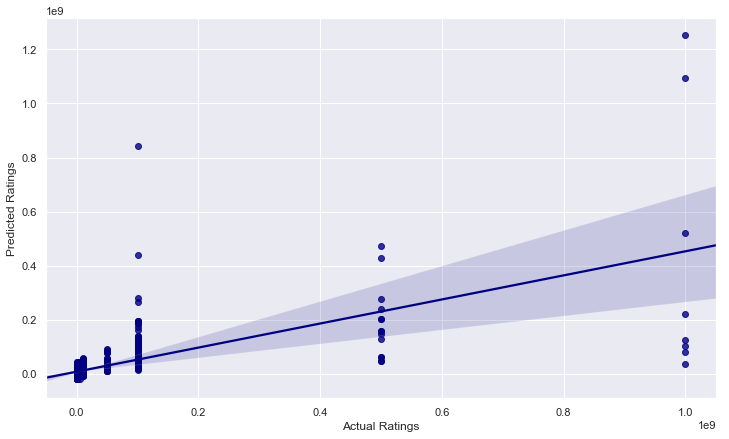

In [75]:
X = app_data.drop(labels = ['Last Update Category','Installs','Category','App','Type','Content Rating','Genres','Last Updated','Current Ver','Android Ver','Current Ver Num','Android Ver Num'],axis=1)
y = app_data['Installs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

model = sklearn.linear_model.LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

def reportplot_model(y_test,y_pred):
    print("MODEL MEAN SQUARED ERROR:",metrics.mean_squared_error(y_test,y_pred))
    print("MODEL R2 SCORE:",metrics.r2_score(y_test,y_pred))

    plt.figure(figsize=(12,7))
    sns.regplot(y_test,y_pred,color='navy', label = 'Integer')
    plt.ylabel('Predicted Ratings')
    plt.xlabel('Actual Ratings')
    plt.show()
    
reportplot_model(y_test,y_pred)

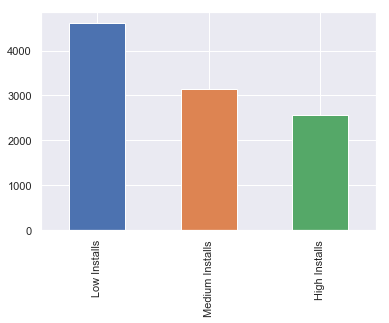

In [76]:
def install_category(row):
    if row<100000:
        return "Low Installs"
    elif row>=100000 and row<=1000000:
        return "Medium Installs"
    else:
        return "High Installs"

app_data['Installs Category'] = app_data['Installs'].apply(install_category)
app_data['Installs Category'].value_counts().plot(kind='bar')

0.8844961240310077


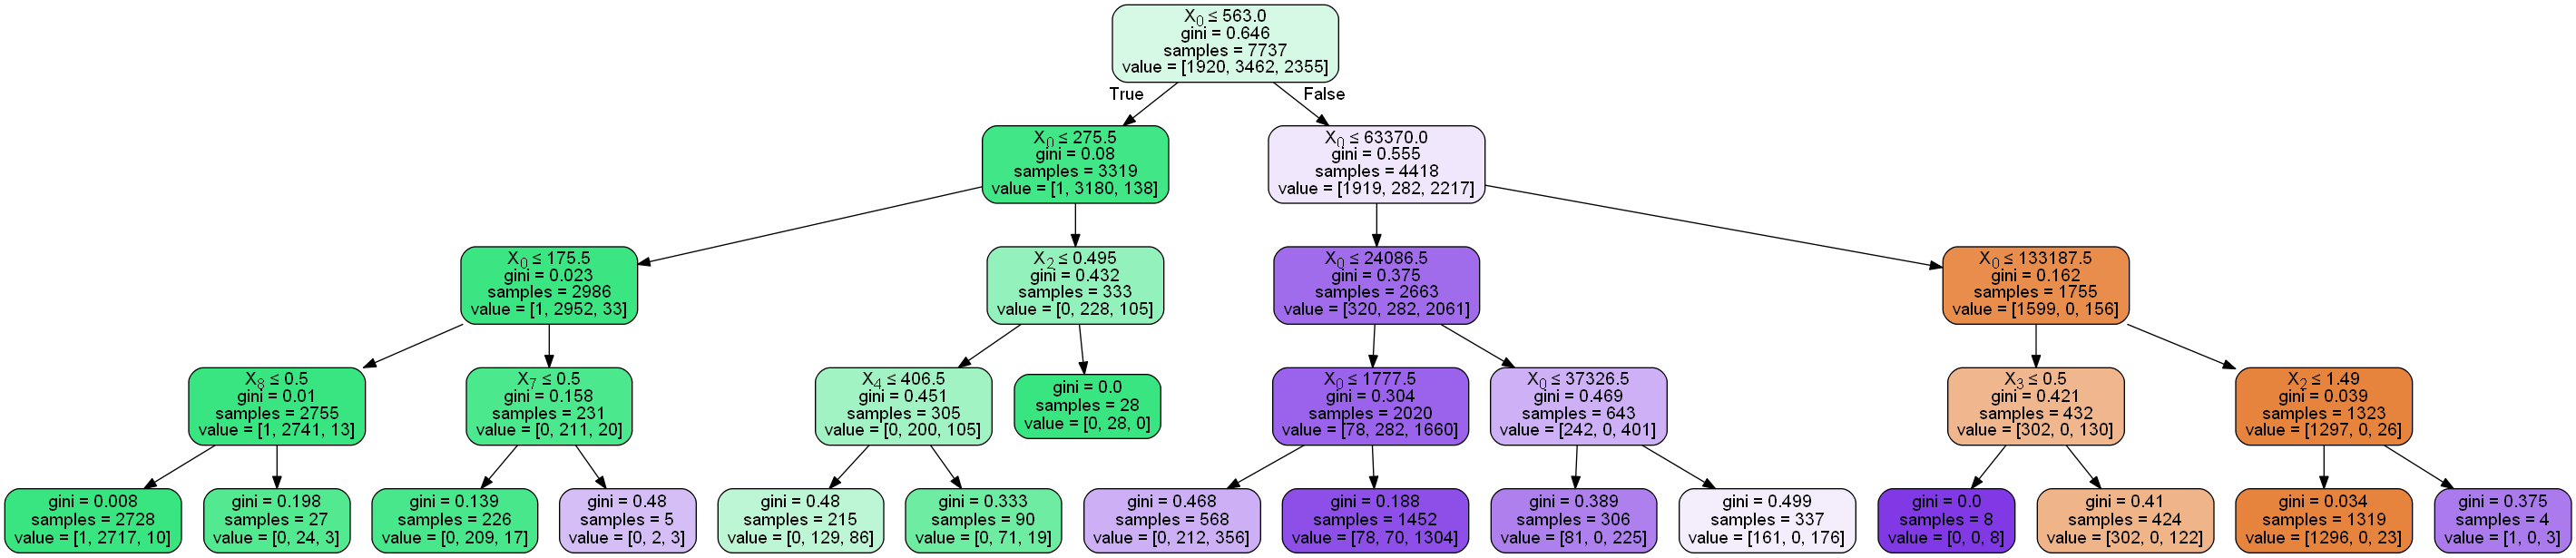

In [77]:
X = app_data.drop(labels = ['Last Update Category','Installs','Installs Category','Rating','Category','App','Type','Content Rating','Genres','Last Updated','Current Ver','Android Ver','Current Ver Num','Android Ver Num','Label'],axis=1)
y = app_data['Installs Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


# dtree_model = DecisionTreeClassifier(max_depth = 4).fit(X_train, y_train) 
# dtree_predictions = dtree_model.predict(X_test) 
# print(dtree_model.score(X_test,y_test))

# # creating a confusion matrix 
# cm = confusion_matrix(y_test, dtree_predictions) 


dot_data = StringIO()
dtree = DecisionTreeClassifier(max_depth = 4).fit(X_train, y_train) 
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
print(dtree.score(X_test,y_test))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Using the decision tree we can see that the most important factors affecting app installs are:
<ul><li> The number of app reviews. People are likely to look at reviews before installing apps, thus more reviews lead to more app installs.
    <li> The size of the app. People are likely to prefer lightweight apps. Lightweight apps are also easier to install on older and low-end smartphones.
        <li> The price of the app. Higher priced apps have lower installs.
            <li> Whether the app is free. Free apps are more likely to be installed. 
            <li> When the app was last updated. The more time that has passed since the app was last installed, the lower installs it'll have.

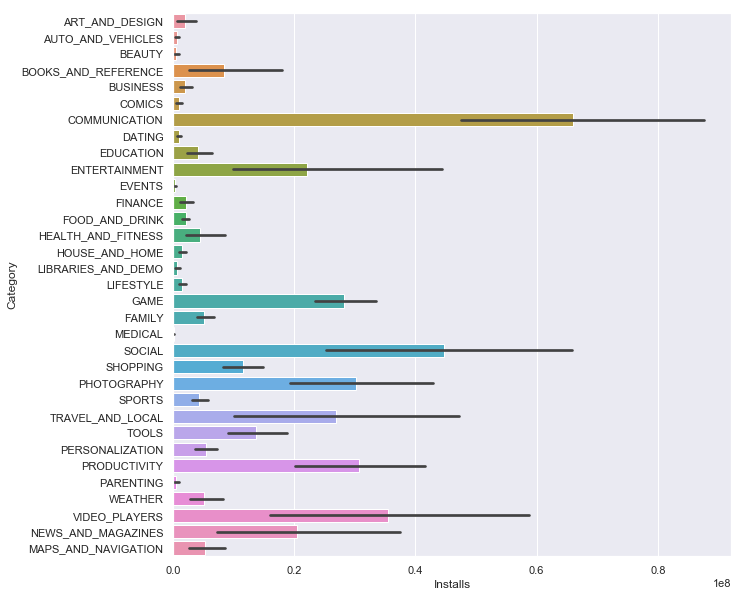

In [78]:
plt.figure(figsize=(10,10)) 
sns.barplot(x=app_data['Installs'],y=app_data['Category'])

We can also see that some categories have higher number of installs e.g communication, video plyers, social apps and productivity apps.

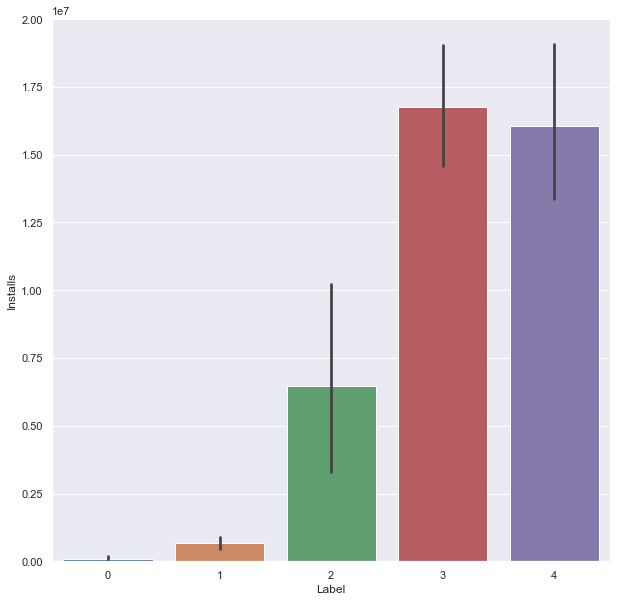

In [79]:
plt.figure(figsize=(10,10)) 
sns.barplot(y=app_data['Installs'],x=app_data['Label'])

We can also see that apps having rating between 4 and 5 have the highest number of installs, We can also see that apps with ratings between 3.5 and 4 have siginificantly lower installs. Apps below 3.5 have very low number of installs showing that a bad rating on the play store will most likely mean that the app will not be installed much.